In [2]:
import pandas as cla_imbps
cla_imb = cla_imbps.read_csv('ppcess_drug200.csv')
cla_imb

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [3]:
cla_imb['Drug'].value_counts()

Drug
4    91
3    54
0    23
2    16
1    16
Name: count, dtype: int64

In [4]:
cla_imb_XP = cla_imb.drop('Drug',axis=1)
cla_imb_YQ = cla_imb['Drug']

In [5]:
cla_imb_XP

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [6]:
cla_imb_YQ

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 200, dtype: int64

In [7]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler as cla_undrsmp
from collections import Counter as cla_cnt

cla_imb_YQ = cla_imb['Drug']

print('Actual Data   :  %s' % cla_cnt(cla_imb_YQ))
cla_smote = cla_undrsmp()
cla_imb_XP, cla_imb_YQ = cla_smote.fit_resample(cla_imb_XP, cla_imb_YQ)
print('Balanced Data : %s' % cla_cnt(cla_imb_YQ))

Actual Data   :  Counter({4: 91, 3: 54, 0: 23, 2: 16, 1: 16})
Balanced Data : Counter({0: 16, 1: 16, 2: 16, 3: 16, 4: 16})


In [8]:
from sklearn.model_selection import train_test_split as cla_imbns
import warnings as cla_imbng
cla_imbng.filterwarnings("ignore")

In [9]:
cla_rs=36
cla_ti=0.4
cla_ti1=0.5

# ::::train data--60%::::
cla_imb_XPtr, cla_imb_XPte, cla_imb_YQtr, cla_imb_YQte = cla_imbns(cla_imb_XP, cla_imb_YQ, test_size=cla_ti, random_state= cla_rs)
# ::::test,validation---20% & 20%
cla_imb_XPva, cla_imb_XPte, cla_imb_YQva, cla_imb_YQte = cla_imbns(cla_imb_XPte, cla_imb_YQte, test_size=cla_ti1, random_state= cla_rs)

print("Training data    :", cla_imb_XPtr.shape)
print("Testing data     :", cla_imb_XPte.shape)
print("Validation data  :", cla_imb_XPva.shape)

Training data    : (48, 5)
Testing data     : (16, 5)
Validation data  : (16, 5)


### Tree based algorithm

In [10]:
from sklearn.metrics import classification_report as cla_imbcfc
from sklearn.metrics import confusion_matrix as cla_imbcom
from sklearn.metrics import ConfusionMatrixDisplay as cla_imbcmdi
from sklearn.model_selection import GridSearchCV as cla_imbgdrc
import time as cla_imbttim

#### Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier as hosp_mrt_dte

In [12]:
cladt_prm_gid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
cladt_gsh = cla_imbgdrc(estimator=hosp_mrt_dte(), param_grid=cladt_prm_gid, cv=5)
cladt_gsh.fit(cla_imb_XPtr, cla_imb_YQtr)
print("Best Parameter",cladt_gsh.best_params_)
cladt_mdl = cladt_gsh.best_estimator_

Best Parameter {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


**************classification report for validation data*****************
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.93      0.95      0.93        16
weighted avg       0.96      0.94      0.94        16

**************confusion matrix for validation data*****************


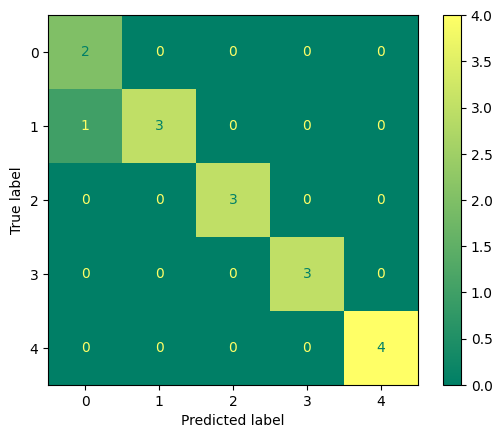

In [13]:

drug_pdt_val = cladt_mdl.predict(cla_imb_XPva)
print("**************classification report for validation data*****************")
print(cla_imbcfc(cla_imb_YQva, drug_pdt_val))
print("**************confusion matrix for validation data*****************")
cm_val = cla_imbcom(cla_imb_YQva, drug_pdt_val)
disp_val = cla_imbcmdi(confusion_matrix=cm_val, display_labels=[0, 1, 2, 3, 4])
disp_val.plot(cmap = 'summer')


**************classification report for testing data*****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

**************confusion matrix for testing data*****************


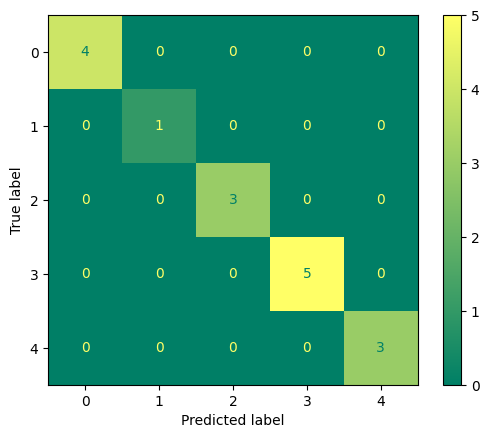

In [14]:

drug_pred_test = cladt_mdl.predict(cla_imb_XPte)
print("**************classification report for testing data*****************")
print(cla_imbcfc(cla_imb_YQte, drug_pred_test))
print("**************confusion matrix for testing data*****************")
cm_test = cla_imbcom(cla_imb_YQte, drug_pred_test)
disp_test = cla_imbcmdi(confusion_matrix=cm_test, display_labels=[0, 1, 2, 3, 4])
disp_test.plot(cmap = 'summer')

#### Extra Trees Classifier

In [15]:
from sklearn.ensemble import ExtraTreesClassifier as hosp_mrt_extr

In [16]:

clapm_gid_et = {
    'n_estimators': [50, 100],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
cla_gid_sh_et = cla_imbgdrc(estimator=hosp_mrt_extr(), param_grid=clapm_gid_et, cv=5)
cla_gid_sh_et.fit(cla_imb_XPtr, cla_imb_YQtr)
print("Best Parameter",cla_gid_sh_et.best_params_)
cla_et_mod = cla_gid_sh_et.best_estimator_

Best Parameter {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


**************classification report for validation data*****************
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.75      0.86         4
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         3
           4       1.00      0.75      0.86         4

    accuracy                           0.88        16
   macro avg       0.88      0.90      0.87        16
weighted avg       0.91      0.88      0.88        16

**************confusion matrix for validation data*****************


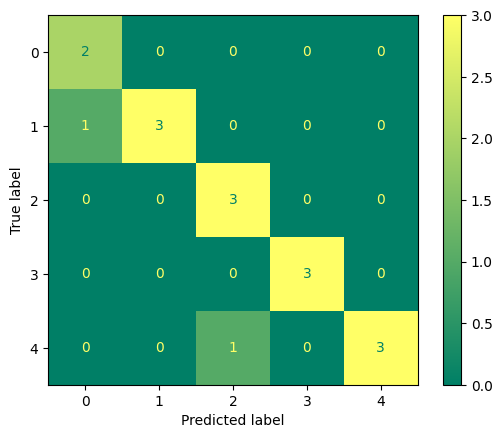

In [17]:

drug_pdt_val = cla_et_mod.predict(cla_imb_XPva)
print("**************classification report for validation data*****************")
print(cla_imbcfc(cla_imb_YQva, drug_pdt_val))
print("**************confusion matrix for validation data*****************")
cm_val = cla_imbcom(cla_imb_YQva, drug_pdt_val)
disp_val = cla_imbcmdi(confusion_matrix=cm_val, display_labels=[0, 1, 2, 3, 4])
disp_val.plot(cmap = 'summer')

**************classification report for testing data*****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

**************confusion matrix for testing data*****************


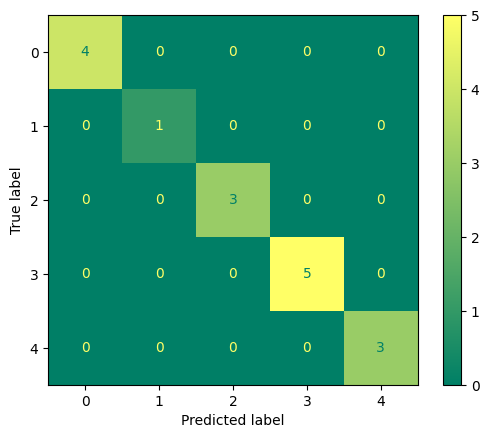

In [18]:

drug_pred_test = cla_et_mod.predict(cla_imb_XPte)
print("**************classification report for testing data*****************")
print(cla_imbcfc(cla_imb_YQte, drug_pred_test))
print("**************confusion matrix for testing data*****************")
cm_test = cla_imbcom(cla_imb_YQte, drug_pred_test)
disp_test = cla_imbcmdi(confusion_matrix=cm_test, display_labels=[0, 1, 2, 3, 4])
disp_test.plot(cmap = 'summer')

### Ensemble methods

##
## AdaBoost Classifier

In [19]:
from sklearn.ensemble import AdaBoostClassifier as hosp_mrt_adst

In [20]:
clapam_gid_ab = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}
cla_gid_sh_ab = cla_imbgdrc(estimator=hosp_mrt_adst(), param_grid=clapam_gid_ab, cv=5)
cla_gid_sh_ab.fit(cla_imb_XPtr, cla_imb_YQtr)
print("Best Parameter",cla_gid_sh_ab.best_params_)
cla_ab_modl = cla_gid_sh_ab.best_estimator_

Best Parameter {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 100}


**************classification report for validation data*****************
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4
           2       1.00      1.00      1.00         3
           3       0.75      1.00      0.86         3
           4       1.00      0.75      0.86         4

    accuracy                           0.69        16
   macro avg       0.62      0.75      0.64        16
weighted avg       0.62      0.69      0.62        16

**************confusion matrix for validation data*****************


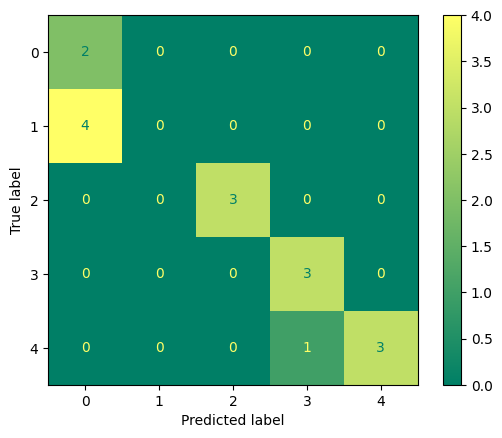

In [21]:

drug_pdt_val = cla_ab_modl.predict(cla_imb_XPva)
print("**************classification report for validation data*****************")
print(cla_imbcfc(cla_imb_YQva, drug_pdt_val))
print("**************confusion matrix for validation data*****************")
cm_val = cla_imbcom(cla_imb_YQva, drug_pdt_val)
disp_val = cla_imbcmdi(confusion_matrix=cm_val, display_labels=[0, 1, 2, 3, 4])
disp_val.plot(cmap = 'summer')

**************classification report for testing data*****************
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         3
           3       1.00      0.40      0.57         5
           4       1.00      1.00      1.00         3

    accuracy                           0.75        16
   macro avg       0.66      0.68      0.63        16
weighted avg       0.79      0.75      0.71        16

**************confusion matrix for testing data*****************


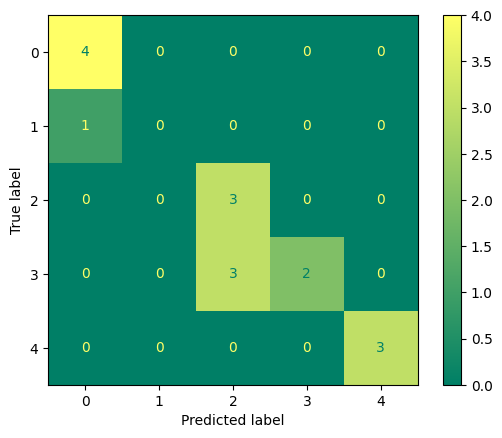

In [22]:

drug_pred_test = cla_ab_modl.predict(cla_imb_XPte)
print("**************classification report for testing data*****************")
print(cla_imbcfc(cla_imb_YQte, drug_pred_test))
print("**************confusion matrix for testing data*****************")
cm_test = cla_imbcom(cla_imb_YQte, drug_pred_test)
disp_test = cla_imbcmdi(confusion_matrix=cm_test, display_labels=[0, 1, 2, 3, 4])
disp_test.plot(cmap = 'summer')

#### Bagging Classifier

In [23]:
from sklearn.ensemble import BaggingClassifier as hosp_mrt_bags

In [24]:
cla_pam_gid_bg = {
    'n_estimators': [10, 50],
    'max_samples': [0.5, 0.8],
    'max_features': [0.5, 0.8],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}
cla_gid_sh_bg = cla_imbgdrc(estimator=hosp_mrt_bags(), param_grid=cla_pam_gid_bg, cv=5)
cla_gid_sh_bg.fit(cla_imb_XPtr, cla_imb_YQtr)
print("Best Parameter",cla_gid_sh_bg.best_params_)
clabg_mdl = cla_gid_sh_bg.best_estimator_

Best Parameter {'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 50}


**************classification report for validation data*****************
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.93      0.95      0.93        16
weighted avg       0.96      0.94      0.94        16

**************confusion matrix for validation data*****************


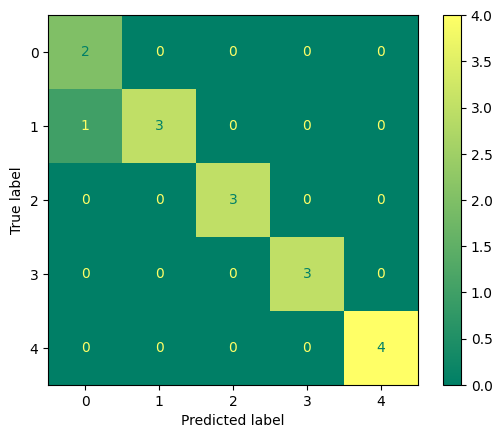

In [25]:

drug_pdt_val = clabg_mdl.predict(cla_imb_XPva)
print("**************classification report for validation data*****************")
print(cla_imbcfc(cla_imb_YQva, drug_pdt_val))
print("**************confusion matrix for validation data*****************")
cm_val = cla_imbcom(cla_imb_YQva, drug_pdt_val)
disp_val = cla_imbcmdi(confusion_matrix=cm_val, display_labels=[0, 1, 2, 3, 4])
disp_val.plot(cmap = 'summer')

**************classification report for testing data*****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

**************confusion matrix for testing data*****************


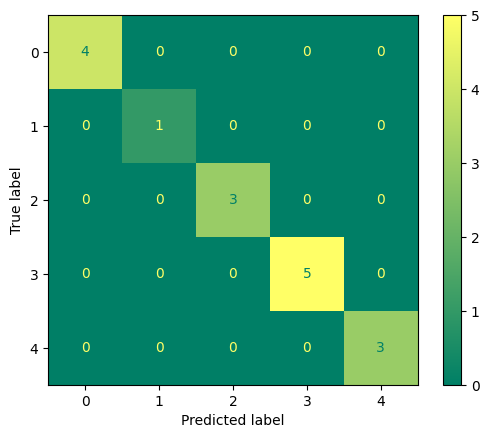

In [26]:

drug_pred_test = clabg_mdl.predict(cla_imb_XPte)
print("**************classification report for testing data*****************")
print(cla_imbcfc(cla_imb_YQte, drug_pred_test))
print("**************confusion matrix for testing data*****************")
cm_test = cla_imbcom(cla_imb_YQte, drug_pred_test)
disp_test = cla_imbcmdi(confusion_matrix=cm_test, display_labels=[0, 1, 2, 3, 4])
disp_test.plot(cmap = 'summer')

### Naive Bayes classifiers

#### BernoulliNB

In [27]:
from sklearn.naive_bayes import BernoulliNB as hosp_mrt_beru

In [28]:
cla_pam_gid_bnb = {
    'alpha': [0.0, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
}
cla_pam_gid_sh = cla_imbgdrc(estimator=hosp_mrt_beru(), param_grid=cla_pam_gid_bnb, cv=5)
cla_pam_gid_sh.fit(cla_imb_XPtr, cla_imb_YQtr)
print("Best Parameter",cla_pam_gid_sh.best_params_)
cla_bnb_mdl = cla_pam_gid_sh.best_estimator_

Best Parameter {'alpha': 0.0, 'fit_prior': True}


**************classification report for validation data*****************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         4
           2       0.33      1.00      0.50         3
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         4

    accuracy                           0.25        16
   macro avg       0.27      0.27      0.20        16
weighted avg       0.25      0.25      0.19        16

**************confusion matrix for validation data*****************


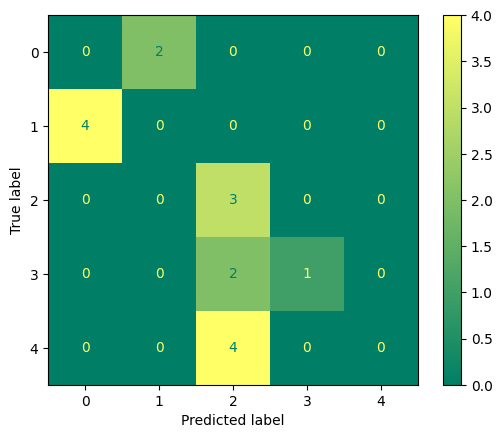

In [29]:

drug_pdt_val = cla_bnb_mdl.predict(cla_imb_XPva)
print("**************classification report for validation data*****************")
print(cla_imbcfc(cla_imb_YQva, drug_pdt_val))
print("**************confusion matrix for validation data*****************")
cm_val = cla_imbcom(cla_imb_YQva, drug_pdt_val)
disp_val = cla_imbcmdi(confusion_matrix=cm_val, display_labels=[0, 1, 2, 3, 4])
disp_val.plot(cmap = 'summer')

**************classification report for testing data*****************
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.00      0.00      0.00         1
           2       0.75      1.00      0.86         3
           3       1.00      0.80      0.89         5
           4       0.00      0.00      0.00         3

    accuracy                           0.62        16
   macro avg       0.47      0.51      0.48        16
weighted avg       0.60      0.62      0.61        16

**************confusion matrix for testing data*****************


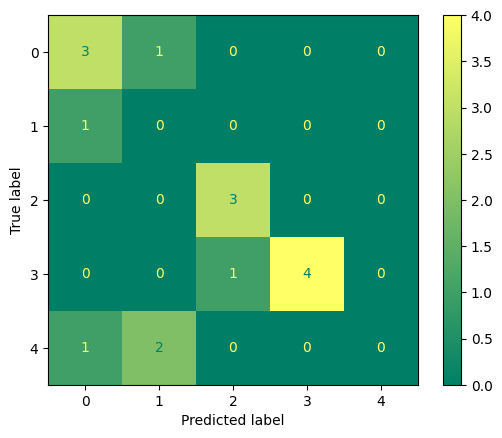

In [30]:

drug_pred_test = cla_bnb_mdl.predict(cla_imb_XPte)
print("**************classification report for testing data*****************")
print(cla_imbcfc(cla_imb_YQte, drug_pred_test))
print("**************confusion matrix for testing data*****************")
cm_test = cla_imbcom(cla_imb_YQte, drug_pred_test)
disp_test = cla_imbcmdi(confusion_matrix=cm_test, display_labels=[0, 1, 2, 3, 4])
disp_test.plot(cmap = 'summer')

#### GaussianNB

In [31]:
from sklearn.naive_bayes import GaussianNB as hosp_mrt_gus

In [32]:
cla_pam_gid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
cla_pam_gid_sh = cla_imbgdrc(estimator=hosp_mrt_gus(), param_grid=cla_pam_gid, cv=5)
cla_pam_gid_sh.fit(cla_imb_XPtr, cla_imb_YQtr)
print("Best Parameter",cla_pam_gid_sh.best_params_)
mdl_gnb = cla_pam_gid_sh.best_estimator_

Best Parameter {'var_smoothing': 1e-07}


**************classification report for validation data*****************
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.75      0.86         4
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00         3
           4       1.00      0.50      0.67         4

    accuracy                           0.81        16
   macro avg       0.85      0.85      0.81        16
weighted avg       0.88      0.81      0.81        16

**************confusion matrix for validation data*****************


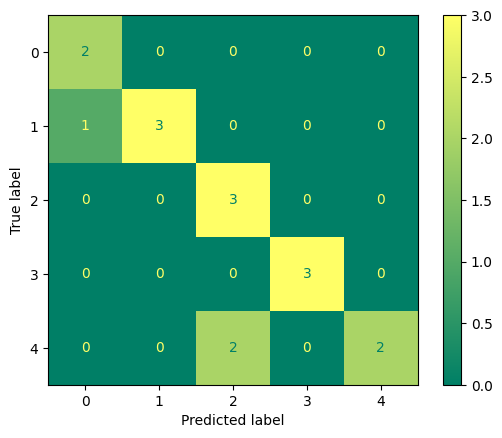

In [33]:

drug_pdt_val = mdl_gnb.predict(cla_imb_XPva)
print("**************classification report for validation data*****************")
print(cla_imbcfc(cla_imb_YQva, drug_pdt_val))
print("**************confusion matrix for validation data*****************")
cm_val = cla_imbcom(cla_imb_YQva, drug_pdt_val)
disp_val = cla_imbcmdi(confusion_matrix=cm_val, display_labels=[0, 1, 2, 3, 4])
disp_val.plot(cmap = 'summer')

**************classification report for testing data*****************
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      0.67      0.80         3

    accuracy                           0.94        16
   macro avg       0.96      0.93      0.94        16
weighted avg       0.95      0.94      0.93        16

**************confusion matrix for testing data*****************


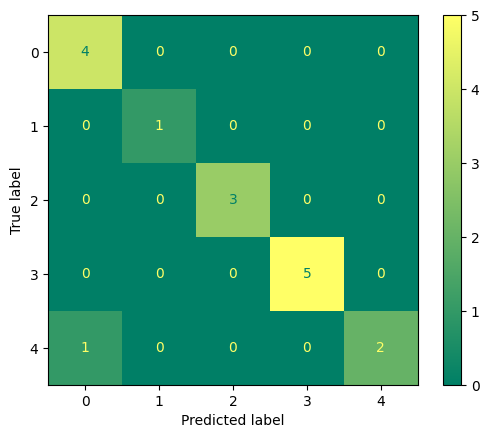

In [34]:

drug_pred_test = mdl_gnb.predict(cla_imb_XPte)
print("**************classification report for testing data*****************")
print(cla_imbcfc(cla_imb_YQte, drug_pred_test))
print("**************confusion matrix for testing data*****************")
cm_test = cla_imbcom(cla_imb_YQte, drug_pred_test)
disp_test = cla_imbcmdi(confusion_matrix=cm_test, display_labels=[0, 1, 2, 3, 4])
disp_test.plot(cmap = 'summer')